In [2]:
import pandas as pd

# 데이터 확인

In [8]:
시군구=pd.read_excel("./시군구종합데이터.xlsx")
행정동=pd.read_excel("./행정동단위통합데이터.xlsx")

In [5]:
녹지면적=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\추가데이터\행정동별 녹지면적.csv")

In [9]:
행정동=pd.merge(행정동,녹지면적,left_on="ADM_NM",right_on="ADM_NM")

In [12]:
행정동

,Unnamed: 0.1,Unnamed: 0,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),...,토출량(㎥/분),펌프(합산),노후건물수,월_평균_소득_금액,지출_총금액,경찰,소방서,병원,침수횟수,GREEN_AREA
0,0,0,송파구,가락1동,0.654167,1,0,3.812500,542.994437,20605.22388,...,150,500,14,4973588,5445589750,0,1,6,2,39.607754
1,1,2,송파구,가락2동,0.842105,0,0,7.125000,1074.589206,32888.54167,...,1992,5800,494,3910198,6054228000,0,0,37,11,52.844042
2,2,3,송파구,가락본동,0.680000,0,0,10.785714,2056.158356,22821.23894,...,1992,5800,657,3521561,8160591000,1,0,86,15,91.714215
3,3,4,구로구,가리봉동,0.688073,0,0,9.666667,1184.743571,31655.00000,...,620,1550,910,2336331,1087078000,1,0,12,19,5.368919
4,4,5,금천구,가산동,0.610245,1,0,8.772727,468.909180,10567.85714,...,640,1590,788,2567594,36128649250,1,0,65,56,4.972897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,815,용산구,효창동,0.980769,1,0,12.666667,3363.536779,24777.27273,...,1096,3100,419,3523201,974093250,0,0,12,0,136.136473
396,396,817,용산구,후암동,1.000000,1,0,39.625000,346.532474,19465.11628,...,630,1400,1177,3013677,2002563750,1,1,15,0,283.456489
397,397,819,동대문구,휘경1동,0.405797,1,0,5.800000,754.989114,25936.50794,...,668,2280,1200,2722774,3357385250,0,0,28,0,15.093137
398,398,821,동대문구,휘경2동,0.300578,1,1,5.583333,640.702435,24180.95238,...,668,2280,887,3071586,2217352000,1,1,8,0,108.279326


# 침수여부 확인
- 1. 의사결정나무
- 2. Logistic Regression

## 데이터 사용방법
- 1. 시군구 데이터 X
- 2. 시군구 데이터 O

### 1. 시군구 데이터 X

In [13]:
#침수여부
행정동["침수여부"]=0
행정동.loc[행정동["침수횟수"]>0,"침수여부"]=1
target="침수여부"
feature=['배수등급양호비율', '제방', '수문', '평균경사도(%)',
       '하천까지의거리(중심)', '인구밀도(명/km²)', '1분위소득가구비율(%)', '2분위소득가구비율(%)',
       '3분위소득가구비율(%)', '4분위소득가구비율(%)', '5분위소득가구비율(%)', '빗물펌프장까지의거리(m)',
       '토출량(㎥/분)', '펌프(합산)', '노후건물수', '월_평균_소득_금액', '지출_총금액', '경찰', '소방서',
       '병원',"GREEN_AREA"]

#### 1-1. 의사결정나무

#### 1-2. Logistic Regression

In [18]:
import statsmodels.api as sm # Logistic Regression
import sklearn.preprocessing as skpre # Preprocessing

In [15]:
import matplotlib.pyplot as plt # 시각화 해야함
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"

In [6]:
# Pairplot
plt.figure()
sb.pairplot(행정동[feature])
plt.show()
plt.close()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [19]:
# 박스플롯으로 확인하기 위해 스케일링
minmax=skpre.MaxAbsScaler()
minmax.fit(X=행정동[feature])

MaxAbsScaler()

In [20]:
# minmax scale
pre_행정동=행정동.copy()
pre_행정동[feature]=pd.DataFrame(minmax.transform(X=행정동[feature]),columns=feature)

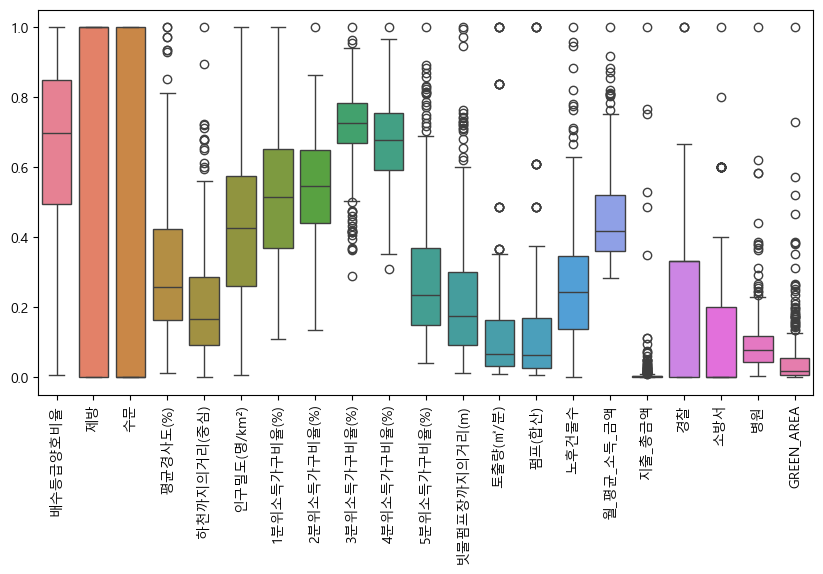

In [26]:
# 박스플롯
feature_num=len(feature)
plt.figure(figsize=(10,5))
sb.boxplot(pre_행정동[feature])
plt.xticks(rotation=90)
plt.show()

In [37]:
# 후진제거법
def backward_elimination(X, y, significance_level=0.05):
    included = list(X.columns)
    
    while True:
        changed = False
        model = sm.Logit(y,X[included]).fit()
        p_values = model.pvalues
        worst_feature = None
        
        for feature in included:
            if p_values[feature] > significance_level:
                if worst_feature is None or p_values[feature] > p_values[worst_feature]:
                    worst_feature = feature
        
        if worst_feature is not None:
            included.remove(worst_feature)
            changed = True
        
        if not changed:
            break
    
    model = sm.Logit(y,X[included]).fit()
    return model

In [38]:
test=backward_elimination(y=pre_행정동[target],X=pre_행정동[feature],significance_level=0.1)

Optimization terminated successfully.
         Current function value: 0.566248
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566262
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566373
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566773
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567838
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568833
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569513
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570545
  

In [39]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                 0.09984
Time:                        01:27:11   Log-Likelihood:                -231.41
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 7.396e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
배수등급양호비율        0.8275      0.402      2.061      0.039       0.041       1.614
하천까지의거리(중심)    -2.2682      0.711     -3.189      0.001      -3.662      -0.874
노후건물수           3.1929      0.714      4.474      0.000       1.794       4.592
월_평균_소득_금액     -1.4630      0.628     -2.329      0.020      -2.694      -0.232
소방서             1.7181      0.828      2.075      0.038       0.095       3.341
병원              4.1512      1.751      2.371      0.018       0.720       7.583
===============================================================================
"""

In [40]:
# 상수항 추가하지 않음
logic_model_nonconst=sm.Logit(endog=pre_행정동[target],exog=pre_행정동[feature]).fit()
logic_model_nonconst.summary()

Optimization terminated successfully.
         Current function value: 0.566248
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      379
Method:                           MLE   Df Model:                           20
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1189
Time:                        01:29:00   Log-Likelihood:                -226.50
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 4.728e-06
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
배수등급양호비율          1.0175      0.538      1.890      0.059      -0.038       2.072
제방                0.1010      0.319      0.316      0.752      -0.525       0.727
수문               -0.3208      0.295     -1.089      0.276      -0.898       0.257
평균경사도(%)         -0.5776      0.736     -0.784      0.433      -2.021       0.866
하천까지의거리(중심)      -2.3359      0.867     -2.694      0.007      -4.035      -0.637
인구밀도(명/km²)       0.0802      0.753      0.107      0.915      -1.395       1.556
1분위소득가구비율(%)     -1.4656      1.614     -0.908      0.364      -4.628       1.697
2분위소득가구비율(%)      3.3288      2.292      1.452      0.146      -1.164       7.822
3분위소득가구비율(%)     -1.0686      1.664     -0.642      0.521      -4.329       2.192
4분위소득가구비율(%)     -0.6485      1.331     -0.487      0.626      -3.257       1.960
5분위소득가구비율(%)      3.0822      2.897      1.064      0.287      -2.597       8.761
빗물펌프장까지의거리(m)     1.1210      0.784      1.429      0.153      -0.416       2.658
토출량(㎥/분)          4.6194      4.117      1.122      0.262      -3.449      12.688
펌프(합산)           -4.4198      4.288     -1.031      0.303     -12.823       3.984
노후건물수             3.8063      1.118      3.403      0.001       1.614       5.998
월_평균_소득_금액       -3.6147      2.938     -1.230      0.219      -9.372       2.143
지출_총금액           -0.5769      1.613     -0.358      0.721      -3.739       2.585
경찰               -0.2613      0.627     -0.417      0.677      -1.490       0.968
소방서               1.8251      0.861      2.120      0.034       0.138       3.512
병원                4.1225      1.869      2.205      0.027       0.459       7.786
GREEN_AREA       -1.0405      1.430     -0.727      0.467      -3.844       1.763
=================================================================================
"""

In [ ]:
# 상수항 추가함
logic_model_const=sm.Lojgit(endog=행정동[target],exog=sm.add_constant(행정동[feature])).fit()
logic_model_const.summary()

Optimization terminated successfully.
         Current function value: 0.566810
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      379
Method:                           MLE   Df Model:                           20
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.1181
Time:                        21:24:41   Log-Likelihood:                -226.72
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 5.555e-06
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           105.5313    411.927      0.256      0.798    -701.830     912.893
배수등급양호비율          0.9639      0.534      1.805      0.071      -0.082       2.010
제방                0.1017      0.319      0.318      0.750      -0.524       0.728
수문               -0.3362      0.294     -1.145      0.252      -0.912       0.239
평균경사도(%)         -0.0145      0.018     -0.803      0.422      -0.050       0.021
하천까지의거리(중심)      -0.0005      0.000     -2.684      0.007      -0.001      -0.000
인구밀도(명/km²)    4.904e-06   1.29e-05      0.381      0.703   -2.03e-05    3.01e-05
1분위소득가구비율(%)     -1.0915      4.116     -0.265      0.791      -9.158       6.975
2분위소득가구비율(%)     -0.9665      4.123     -0.234      0.815      -9.048       7.115
3분위소득가구비율(%)     -1.0950      4.121     -0.266      0.790      -9.173       6.982
4분위소득가구비율(%)     -1.0801      4.117     -0.262      0.793      -9.150       6.990
5분위소득가구비율(%)     -1.0112      4.118     -0.246      0.806      -9.083       7.061
빗물펌프장까지의거리(m)     0.0001    9.9e-05      1.305      0.192   -6.48e-05       0.000
토출량(㎥/분)          0.0004      0.000      1.118      0.264      -0.000       0.001
펌프(합산)           -0.0001      0.000     -1.019      0.308      -0.000       0.000
노후건물수             0.0013      0.000      3.439      0.001       0.001       0.002
월_평균_소득_금액    -4.874e-07   3.97e-07     -1.229      0.219   -1.27e-06     2.9e-07
지출_총금액        -2.934e-13   9.93e-13     -0.295      0.768   -2.24e-12    1.65e-12
경찰               -0.0911      0.209     -0.437      0.662      -0.500       0.318
소방서               0.3486      0.170      2.048      0.041       0.015       0.682
병원                0.0100      0.005      2.175      0.030       0.001       0.019
=================================================================================
"""